# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('09-x_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('09-x_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('09-y_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('09-y_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1985,0.697022,-7.556215,19.584345,0.045917,-0.009840,0.240014,30.046570,-24.182615,13.950217,-33.989628,...,9.338017,491.593353,1118.926636,-18.642031,1522.413574,830.344482,-21.954252,2533.163330,817.872864,-28.397928
1042,0.259619,-14.705117,24.421869,0.029963,-0.020739,0.078472,32.586544,-2.939485,15.161948,-12.884745,...,21.383886,559.496582,1290.572876,-25.063726,1659.871704,850.680969,-38.173676,2647.205078,868.587952,-41.695473
891,0.166138,-11.842344,21.642195,0.028417,-0.015018,0.042396,32.885906,-3.846238,19.101217,-9.906158,...,17.396845,414.811981,1186.843018,-26.575436,1386.309204,850.789429,-36.630341,2450.798096,754.320557,-43.524921
2368,0.356883,-15.284270,26.357105,0.121410,-0.023508,0.106845,27.082420,10.431011,1.519755,-7.643614,...,26.715860,481.765228,1132.046265,-15.589812,1476.185669,799.073547,-31.130692,2551.524902,746.815674,-39.831352
2074,0.444292,-10.372796,23.440987,0.035949,-0.023478,0.131390,43.450794,-12.473910,11.423215,-22.240017,...,21.809277,451.856476,1235.009766,-3.468874,1358.977295,1024.204834,-6.535542,2487.913330,738.143311,-20.262344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.300888,-6.994747,18.716999,0.054561,-0.013580,0.559504,29.890221,-9.320832,8.044360,-22.513504,...,17.172222,457.796387,1156.178955,-0.211824,1354.140625,848.131592,-2.435529,2530.845947,565.995056,-13.567032
835,0.153785,-18.830345,24.992212,0.025843,-0.015946,0.045889,29.650818,8.298293,32.074741,-5.432630,...,19.053688,388.937805,1095.186401,-0.894236,1526.216064,932.331909,-28.624914,2338.770020,812.961121,-25.498619
1653,0.552548,-11.101240,17.321346,0.059469,-0.029835,0.168418,38.647396,-18.478529,21.064442,-22.576025,...,14.666048,549.743286,1274.200195,0.065703,1589.453491,992.762939,-9.504184,2534.493164,885.286133,-11.702026
2607,2.543495,-6.623515,16.169693,0.046152,-0.015712,1.543768,2.885798,-13.803088,-26.372902,-41.265076,...,15.606375,880.564697,992.077698,4.379024,2027.592163,569.888550,-4.894196,3039.907715,601.569763,-7.030918


# **BALANCEO DE DATOS**

In [217]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [218]:
overs = RandomOverSampler()

In [219]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [220]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,2
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **MODELO DE MARCHINE LEARNING**

In [221]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_t_overs, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [222]:
y_predict = clf.predict(x_test)
y_predict

array([1, 3, 1, 1, 3, 0, 3, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 0, 2,
       3, 1, 3, 0, 3, 2, 2, 1, 2, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2, 2, 3,
       3, 1, 3, 3, 0, 1, 2, 0, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 3, 0, 2, 3, 0, 1, 2, 0, 0, 3, 1, 0, 3, 1, 3, 2, 3, 2, 1, 3, 2,
       2, 3, 2, 2, 0, 3, 3, 3, 2, 0, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 1, 3,
       1, 0, 3, 1, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3,
       0, 2, 2, 3, 3, 3, 2, 0, 1, 3, 1, 3, 2, 0, 1, 0, 2, 2, 3, 0, 2, 3,
       3, 2, 3, 3, 3, 0, 2, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 2, 2, 2, 3, 0,
       0, 0, 3, 2, 0, 0, 1, 0, 3, 1, 0, 3, 2, 1, 3, 2, 3, 1, 3, 2, 2, 2,
       3, 2, 2, 2, 1, 3, 1, 2, 3, 2, 3, 0, 3, 0, 3, 0, 0, 1, 3, 1, 3, 3,
       1, 2, 3, 3, 2, 2, 3, 2, 1, 2, 0, 2, 3, 1, 3, 3, 0, 2, 3, 3, 0, 3,
       2, 2, 2, 3, 3, 3, 0, 1, 0, 1, 3, 2, 1, 1, 2, 3, 0, 3, 3, 2, 2, 2,
       0, 0, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 1,
       2, 2, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 0, 3, 0,

# **EVALUACION**

In [223]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65        81
           1       0.34      0.34      0.34        97
           2       0.67      0.51      0.58       241
           3       0.55      0.73      0.63       160

    accuracy                           0.56       579
   macro avg       0.55      0.56      0.55       579
weighted avg       0.58      0.56      0.56       579



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.51      0.64      0.57        81
           1       0.24      0.46      0.32        97
           2       0.71      0.41      0.52       241
           3       0.64      0.61      0.63       160

    accuracy                           0.51       579
   macro avg       0.53      0.53      0.51       579
weighted avg       0.58      0.51      0.52       579

Matriz de confusión, sin normalización
[[52 23  5  1]
 [29 45 13 10]
 [14 85 98 44]
 [ 7 33 22 98]]


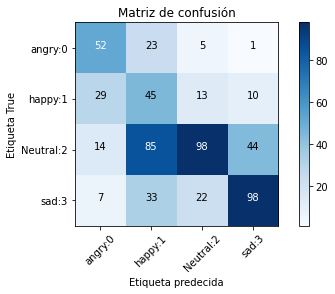

In [13]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

In [227]:
from sklearn import metrics
mayor=0
for i in range(300):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)
  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_t_overs, y_t_overs)
  y_predict = clf.predict(x_test)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
  





 prueba :0 PRECISION ====  0.5250431778929189 
 prueba :1 PRECISION ====  0.5440414507772021 
 prueba :2 PRECISION ====  0.5561312607944733 
 prueba :3 PRECISION ====  0.5492227979274611 
 prueba :4 PRECISION ====  0.5094991364421416 
 prueba :5 PRECISION ====  0.5198618307426598 
 prueba :6 PRECISION ====  0.5025906735751295 
 prueba :7 PRECISION ====  0.538860103626943 
 prueba :8 PRECISION ====  0.5250431778929189 
 prueba :9 PRECISION ====  0.5094991364421416 
 prueba :10 PRECISION ====  0.5198618307426598 
 prueba :11 PRECISION ====  0.5682210708117443 
 prueba :12 PRECISION ====  0.49740932642487046 
 prueba :13 PRECISION ====  0.5077720207253886 
 prueba :14 PRECISION ====  0.5164075993091537 
 prueba :15 PRECISION ====  0.47668393782383417 
 prueba :16 PRECISION ====  0.5371329879101899 
 prueba :17 PRECISION ====  0.49222797927461137 
 prueba :18 PRECISION ====  0.542314335060449 
 prueba :19 PRECISION ====  0.49740932642487046 
 prueba :20 PRECISION ====  0.5284974093264249 


In [228]:
y_predict = modelo.predict(x_test)
y_predict

array([2, 3, 1, 2, 3, 0, 2, 2, 2, 1, 2, 2, 1, 3, 3, 2, 3, 3, 2, 3, 0, 2,
       3, 2, 1, 1, 1, 2, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 2, 3, 1, 2, 1, 3,
       3, 2, 3, 3, 0, 0, 2, 0, 2, 3, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 3, 0, 2, 3, 0, 1, 2, 3, 0, 3, 1, 0, 1, 0, 3, 2, 3, 2, 2, 3, 1,
       2, 3, 2, 1, 1, 3, 3, 3, 0, 0, 2, 3, 2, 1, 1, 2, 3, 1, 2, 1, 1, 3,
       1, 1, 3, 0, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3,
       0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 3, 3, 2, 0, 2, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 2, 2, 1, 3, 1, 3, 1, 2, 1, 2, 3, 2, 2, 3, 3, 2, 2, 0, 3, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 3, 3, 0, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 2, 3, 2, 1, 0, 3, 2, 3, 0, 0, 3, 3, 1, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 0, 2, 3, 2, 3, 1, 0, 2, 3, 2, 0, 3,
       2, 2, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 3, 3, 2, 2, 0, 3, 3, 2, 1, 2,
       1, 1, 1, 3, 2, 1, 1, 3, 3, 2, 3, 2, 3, 1, 3, 1, 2, 2, 3, 3, 3, 1,
       1, 2, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 0, 3, 1,

In [229]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.56      0.60        81
           1       0.37      0.43      0.40        97
           2       0.67      0.59      0.63       241
           3       0.60      0.69      0.64       160

    accuracy                           0.59       579
   macro avg       0.58      0.57      0.57       579
weighted avg       0.60      0.59      0.59       579

